# 97. Interleaving String
---
https://leetcode.com/problems/interleaving-string/

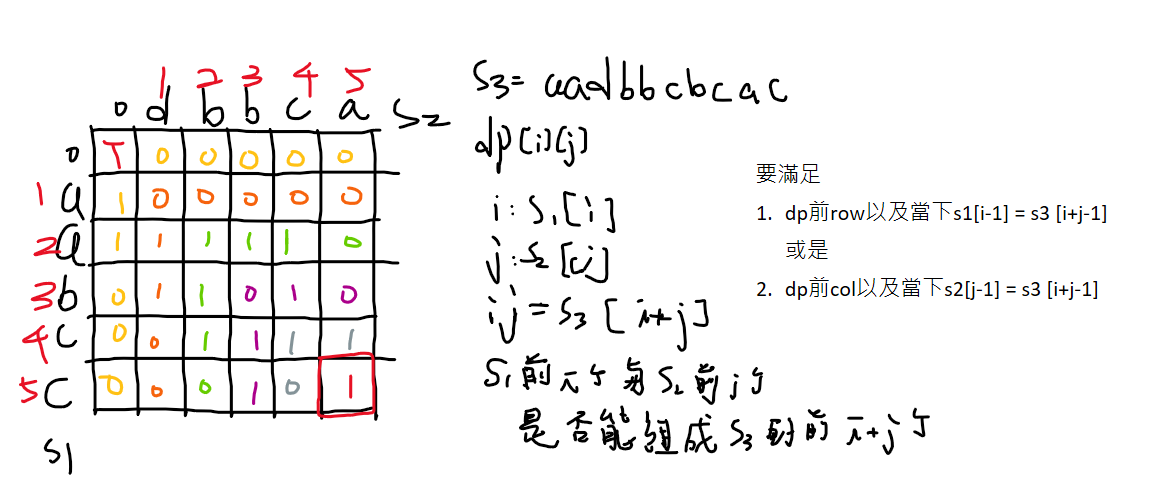

In [6]:
# 2D DP
class Solution:
    def isInterleave(self, s1: str, s2: str, s3: str) -> bool:
        row, col, l = len(s1), len(s2), len(s3)
        if row + col != l:
            return False
        
        dp = [[0] * (col + 1) for _ in range(row + 1)]

        for i in range(row + 1):
            for j in range(col + 1):
                if i == 0 and j == 0:
                    dp[i][j] = True
                
                # 1st row condition
                elif i == 0:
                    dp[i][j] = dp[i][j - 1] and s2[j - 1] == s3[i + j - 1]

                # 1st col condition
                elif j == 0:
                    dp[i][j] = dp[i - 1][j] and s1[i - 1] == s3[i + j - 1]

                # main
                else:
                    dp[i][j] = dp[i][j - 1] and s2[j - 1] == s3[i + j - 1] or \
                               dp[i - 1][j] and s1[i - 1] == s3[i + j - 1]

        return dp[-1][-1]
ans = Solution()
ans.isInterleave(s1 = "aabcc", s2 = "dbbca", s3 = "aadbbcbcac")

True

In [7]:
# memorization  recursion
class Solution:
    def isInterleave(self, s1: str, s2: str, s3: str) -> bool:
        row, col, l = len(s1), len(s2), len(s3)
        if row + col != l:
            return False
        
        def dfs(i, j):
            if i == row and j == col:
                return True
            
            if (i, j) in seen:
                return seen[i, j]
            
            res = False
            if i < row and s1[i] == s3[i + j]:
                res = res or dfs(i + 1, j)

            if j < col and s2[j] == s3[i + j]:
                res = res or dfs(i, j + 1)

            seen[i, j] = res
            return res
        seen = {}
        return dfs(0, 0)
ans = Solution()
ans.isInterleave(s1 = "aabcc", s2 = "dbbca", s3 = "aadbbcbcac")

True